# BIOS470/570 Lecture 8

## Last time we covered:
* ### Missing data, duplicated data, and string operations
* ### merging multiple data sets with pandas

## Today we will cover:
* ### Clustering data 
* ### seaborn plotting package
* ### Gene ontology

### Import the usual packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### We will need three new packages today: seaborn, scipy, and gget. 
* #### seaborn is a plotting package built on top of matplotlib for stastical plotting. It allows for making complex plots with high level functions and is built to run on pandas dataframes. 
* #### scipy has packages for scientific computing. It contains a clustering package that we will use today. 
* #### gget is a new package used for querying a variety of biological databases directly from  python code. We will use it for gene ontology.
### The install commands for these are:
* #### conda install scipy
* #### conda install seaborn
* #### conda install -c bioconda gget

In the last command, the -c flag is for channel. The bioconda channel contains many bio-specific python packages. 

In [3]:
import seaborn as sns
import scipy

In [4]:
data_human = pd.read_excel('data/GSE137492_SupplementaryTable1.xlsx')
data_frog = pd.read_csv('data/xen_uic_hik_stage8_13_30min.tsv',delimiter='\t')
data_frog

/Users/aw21/opt/miniconda3/envs/scRNASeq/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Gene,UIC_1,UIC_2,UIC_3,UIC_4,UIC_5,UIC_6,UIC_7,UIC_8,UIC_9,...,hiK_4,hiK_5,hiK_6,hiK_7,hiK_8,hiK_9,hiK_10,hiK_11,hiK_12,hiK_13
0,ERCC-00002,31214.576742,20746.843327,15820.337040,20838.927449,25080.934940,29831.229808,24861.131004,36816.482281,34312.248268,...,28184.968376,19688.475156,29938.310266,28541.843106,30003.888946,23624.073849,29761.774428,22035.255266,26465.297048,21269.691751
1,ERCC-00003,437.926357,557.064559,866.145398,433.958134,818.379659,679.768702,500.984542,809.144548,406.137935,...,352.206012,492.214783,291.434743,808.480389,237.734226,301.385919,237.534037,460.571027,306.159383,482.196969
2,ERCC-00004,5806.778562,8623.257792,8237.850004,8178.254056,10592.701113,9891.303195,8726.999262,12260.089501,11976.640426,...,13608.644991,16566.958407,9654.972170,12133.451188,14265.971389,12083.938179,8698.798098,12887.553996,12818.688844,12838.119950
3,ERCC-00009,1088.855183,863.714979,671.476023,802.093203,1035.790118,1219.818702,1046.460250,1396.138819,1639.751660,...,1517.123939,991.687522,1460.126178,1427.445192,1620.857266,1145.198951,1564.682693,1073.023014,1322.888859,1045.675688
4,ERCC-00012,0.000000,0.379541,0.452181,0.738587,0.000000,0.343011,0.000000,0.000000,0.306320,...,0.000000,0.347242,0.381030,0.000000,0.245311,0.000000,0.000000,0.245311,0.615651,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34279,gene9998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.201554,0.000000
34280,gene9999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
34281,gene999|pigc,61.549566,91.810776,92.165413,65.268938,52.588501,33.829544,20.088473,9.646476,3.793154,...,108.464857,61.554529,40.733655,25.499081,14.261506,7.053554,7.076894,3.491820,3.906363,3.400443
34282,gene99|pagr1,118.843645,92.368324,87.064401,82.688666,99.880389,101.344282,86.835663,108.325443,93.598130,...,141.626022,153.652799,148.496698,116.247660,93.938793,86.450597,73.302971,73.243916,64.223707,65.597644


In [5]:
data_human.dropna(inplace=True)
# for human data
data_human.index = data_human.loc[:,"genes"]
data_human.drop(["genes"],axis = "columns", inplace = True)
ensIds = data_human.loc[:,"geneIds"]
data_human.drop("geneIds",axis = "columns", inplace = True)

#for frog data
data_frog.index = data_frog.loc[:,"Gene"]
data_frog.drop("Gene",axis = "columns", inplace = True)

### When dealing with large datasets, it is often useful to reduce them to the variables of interest to make the size of the dataset smaller and the processing faster. It can also focus attention on relevant features of the dataset. 

### One of the simplest things is to remove genes with low or no experession in all conditions:


In [69]:
data = data_frog
expressed = data.max(axis = 1) > 1
data = data.loc[expressed]
data

,UIC_1,UIC_2,UIC_3,UIC_4,UIC_5,UIC_6,UIC_7,UIC_8,UIC_9,UIC_10,...,hiK_4,hiK_5,hiK_6,hiK_7,hiK_8,hiK_9,hiK_10,hiK_11,hiK_12,hiK_13
Gene,,,,,,,,,,,,,,,,,,,,,
ERCC-00002,31214.576742,20746.843327,15820.337040,20838.927449,25080.934940,29831.229808,24861.131004,36816.482281,34312.248268,20359.539263,...,28184.968376,19688.475156,29938.310266,28541.843106,30003.888946,23624.073849,29761.774428,22035.255266,26465.297048,21269.691751
ERCC-00003,437.926357,557.064559,866.145398,433.958134,818.379659,679.768702,500.984542,809.144548,406.137935,465.824852,...,352.206012,492.214783,291.434743,808.480389,237.734226,301.385919,237.534037,460.571027,306.159383,482.196969
ERCC-00004,5806.778562,8623.257792,8237.850004,8178.254056,10592.701113,9891.303195,8726.999262,12260.089501,11976.640426,11454.103369,...,13608.644991,16566.958407,9654.972170,12133.451188,14265.971389,12083.938179,8698.798098,12887.553996,12818.688844,12838.119950
ERCC-00009,1088.855183,863.714979,671.476023,802.093203,1035.790118,1219.818702,1046.460250,1396.138819,1639.751660,653.677172,...,1517.123939,991.687522,1460.126178,1427.445192,1620.857266,1145.198951,1564.682693,1073.023014,1322.888859,1045.675688
ERCC-00013,1.595066,2.714069,2.124681,3.556401,5.598264,5.408346,0.000000,1.394690,6.920763,9.474534,...,7.717516,4.473985,0.000000,5.343649,2.166252,1.046044,1.159123,4.255901,5.126609,2.498846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gene9993,0.000000,0.000000,0.000000,0.000000,0.615317,0.000000,0.000000,0.660713,0.638031,0.432219,...,0.394240,0.000000,0.000000,0.000000,0.000000,0.000000,0.394240,0.000000,0.000000,0.000000
gene9994,0.411977,0.143414,0.166301,0.073697,0.234250,0.477723,1.684802,4.581279,4.700683,5.612203,...,0.132233,0.000000,0.675504,4.458419,3.713165,4.380137,5.278313,7.526685,5.823007,8.682288
gene9996,0.000000,1.089618,1.858241,0.000000,0.000000,0.000000,0.000000,0.632419,0.833701,0.000000,...,1.348054,2.442547,0.000000,3.912911,1.004170,0.734557,0.927359,0.773215,0.927359,2.685826


### It can also be helpful to remove genes with very high expression as these tend to dominate downstream analysis but may not be interesting:

In [70]:
notTooHigh = data.max(axis = 1) < 1e3
data = data.loc[notTooHigh]
data

,UIC_1,UIC_2,UIC_3,UIC_4,UIC_5,UIC_6,UIC_7,UIC_8,UIC_9,UIC_10,...,hiK_4,hiK_5,hiK_6,hiK_7,hiK_8,hiK_9,hiK_10,hiK_11,hiK_12,hiK_13
Gene,,,,,,,,,,,,,,,,,,,,,
ERCC-00003,437.926357,557.064559,866.145398,433.958134,818.379659,679.768702,500.984542,809.144548,406.137935,465.824852,...,352.206012,492.214783,291.434743,808.480389,237.734226,301.385919,237.534037,460.571027,306.159383,482.196969
ERCC-00013,1.595066,2.714069,2.124681,3.556401,5.598264,5.408346,0.000000,1.394690,6.920763,9.474534,...,7.717516,4.473985,0.000000,5.343649,2.166252,1.046044,1.159123,4.255901,5.126609,2.498846
ERCC-00014,1.889966,2.116345,2.510183,2.454086,3.179646,2.622225,3.179646,1.833201,2.116345,1.776364,...,2.261401,1.867008,1.231083,2.025006,2.182679,2.103881,1.787878,2.340051,1.310975,2.182679
ERCC-00019,48.257415,30.349689,24.718356,29.049395,41.428361,46.110366,41.897503,47.044360,58.844720,33.543306,...,54.671540,29.691189,47.806524,52.770778,53.789264,39.239181,46.921087,46.035208,58.027586,23.189016
ERCC-00022,355.281526,241.193877,188.460990,242.288192,283.893030,314.592195,285.777094,417.774173,437.532017,362.280051,...,336.684889,330.516285,399.024291,419.249224,384.550873,336.481779,373.506852,302.311640,361.164145,275.670803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gene9993,0.000000,0.000000,0.000000,0.000000,0.615317,0.000000,0.000000,0.660713,0.638031,0.432219,...,0.394240,0.000000,0.000000,0.000000,0.000000,0.000000,0.394240,0.000000,0.000000,0.000000
gene9994,0.411977,0.143414,0.166301,0.073697,0.234250,0.477723,1.684802,4.581279,4.700683,5.612203,...,0.132233,0.000000,0.675504,4.458419,3.713165,4.380137,5.278313,7.526685,5.823007,8.682288
gene9996,0.000000,1.089618,1.858241,0.000000,0.000000,0.000000,0.000000,0.632419,0.833701,0.000000,...,1.348054,2.442547,0.000000,3.912911,1.004170,0.734557,0.927359,0.773215,0.927359,2.685826


### A second commonly used step is to restrict attention to the variable genes, that is genes that change expression between different conditions in the dataset. Genes that are expressed approximately the same in all conditions are probably not of interest for the conditions being studied. One metric for this is to compare the standard deviation with the mean. 

### Here, we implement a cutoff in this ratio:

In [71]:
variable = data.std(axis = 1)/data.mean(axis = 1) > 1.5
data = data.loc[variable]
data

,UIC_1,UIC_2,UIC_3,UIC_4,UIC_5,UIC_6,UIC_7,UIC_8,UIC_9,UIC_10,...,hiK_4,hiK_5,hiK_6,hiK_7,hiK_8,hiK_9,hiK_10,hiK_11,hiK_12,hiK_13
Gene,,,,,,,,,,,,,,,,,,,,,
ERCC-00081,1.463471,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.362920,0.786405,...,0.000000,1.581468,0.0,0.739541,0.000000,0.000000,0.00000,0.575268,0.706771,0.000000
ERCC-00086,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,3.932843,0.000000,0.000000
ERCC-00104,0.000000,0.000000,0.651909,0.0,0.000000,0.000000,0.270371,0.000000,0.462809,0.000000,...,0.000000,0.000000,0.0,0.615195,0.464825,0.000000,0.00000,0.000000,0.000000,0.000000
ERCC-00123,0.000000,1.149186,0.679833,0.0,1.380665,0.000000,0.560652,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,1.839056,0.000000,0.000000,0.00000,1.439658,0.630599,1.104586
ERCC-00134,0.000000,0.000000,0.000000,0.0,1.961959,0.000000,4.299303,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,5.700133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gene9976,0.000000,0.000000,0.000000,0.0,1.402592,0.000000,0.000000,0.000000,0.000000,0.423590,...,1.059703,2.358060,0.0,2.151050,0.000000,0.443603,0.00000,0.000000,0.000000,0.000000
gene9981,0.000000,0.000000,0.000000,0.0,5.976860,20.299485,21.078794,17.169367,5.976860,0.000000,...,6.877211,0.000000,0.0,3.500499,0.000000,5.617674,0.00000,0.000000,3.500499,0.000000
gene9984,0.000000,0.000000,0.000000,0.0,2.381620,1.345219,1.405731,2.361896,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,2.250417,0.000000,0.00000,0.000000,0.000000,0.000000


### Now we will perform a hierachical clustering of the data and visualize it using a heatmap with the tree overlaid. 

### We can call the seaborn clustermap function to do this. Behind the scenes, it is using scipy's hierachical clustering functions to do the clustering. As before we look at log2(data+1) for better visualization.

/Users/aw21/opt/miniconda3/envs/scRNASeq/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


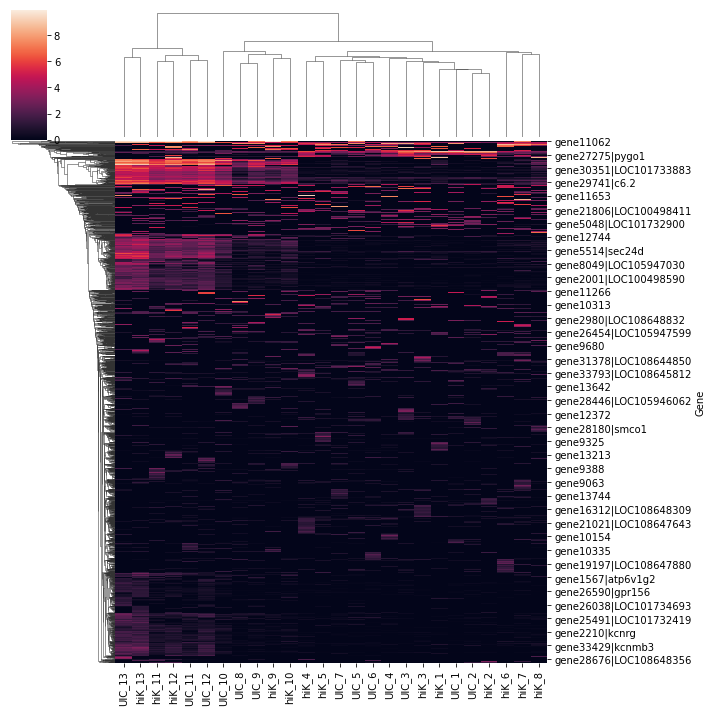

In [72]:
cg = sns.clustermap(np.log2(data+1))


### That could be more informative. Too much of the data fall in the dark part of the colormap. We can use the vmax parameter to set the top of the colormap (there is also an analagous vmin parameter). 

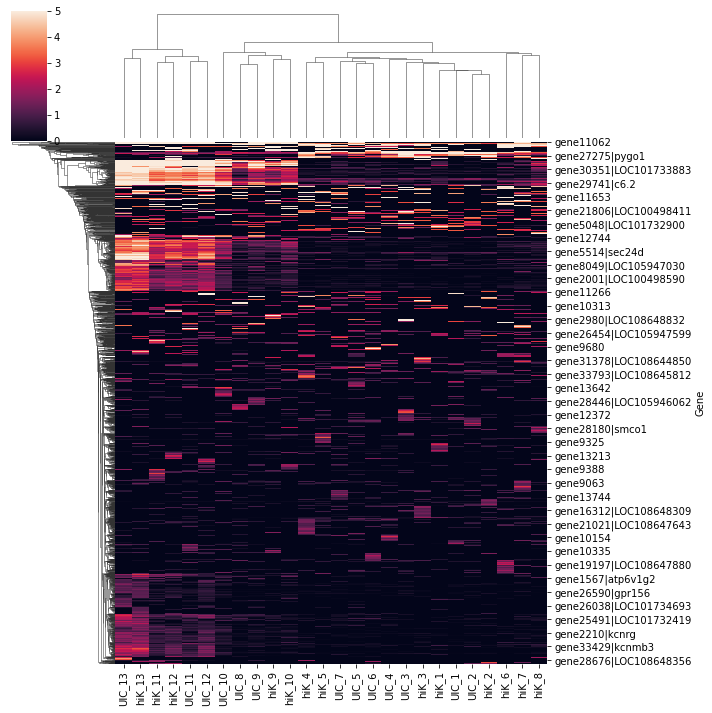

In [73]:
cg = sns.clustermap(np.log2(data+1), vmax = 5)

### Notice that seaborn has handled all the labelling for us based on the index and columns of the data frame. The gene labels on the y axis are just a subset of all the data labels as there are way too many to fit.

### We can also change the colormap to change the colors for the visualization. seaborn has lots of useful built in colormaps:

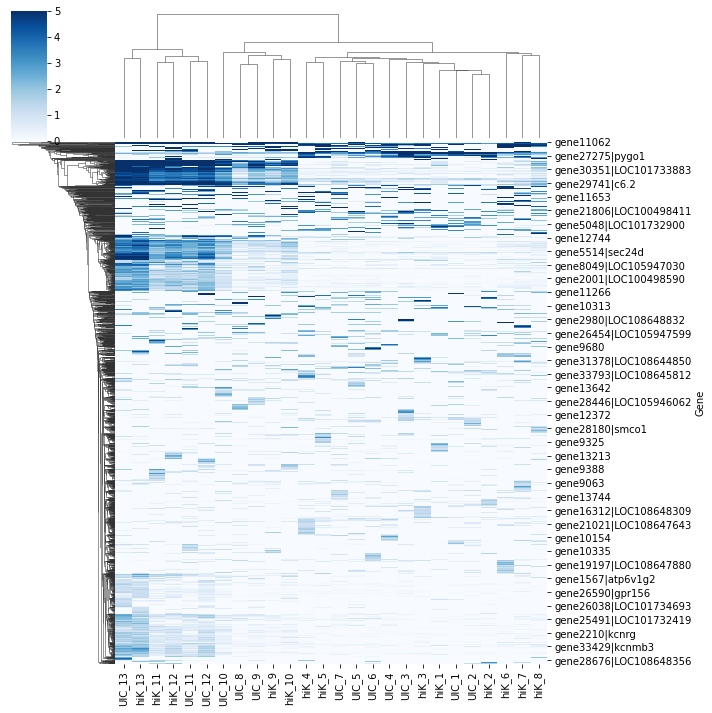

In [74]:
cg = sns.clustermap(np.log2(data+1),vmax = 5, cmap = "Blues")


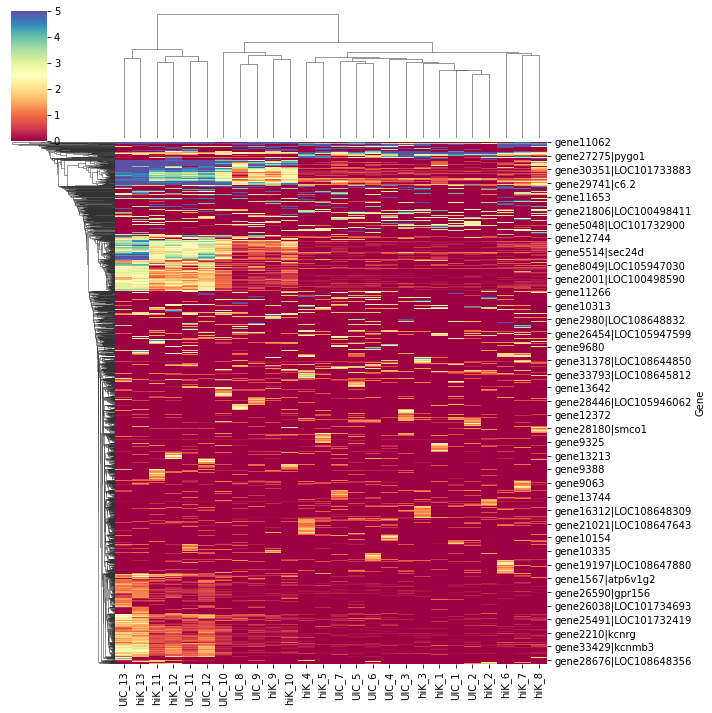

In [75]:
cg = sns.clustermap(np.log2(data+1),vmax = 5, cmap = "Spectral")

### There are lots of options for color in seaborn. See [here](https://seaborn.pydata.org/tutorial/color_palettes.html) for an in depth discussion of color palettes

### The relplot function can also work like the matplotlib function scatter and takes care of labeling for you

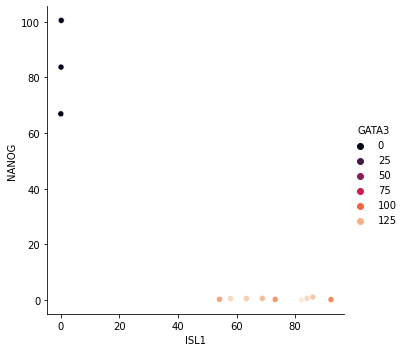

In [76]:
sns.relplot(x = data_human.loc["ISL1"], y = data_human.loc["NANOG"], hue = data_human.loc["GATA3"], palette = "rocket");

### The function clusts can be used to split the hierarchical clustering into discrete clusters. The following will split it in a maximum of 10 clusters. Another choice, criterion = "distance" will split the clusters so that no two observations in the cluster have a distance great than this. 

In [101]:
clusts = scipy.cluster.hierarchy.fcluster(cg.dendrogram_row.linkage,5,criterion="maxclust")
clusts

array([3, 3, 3, ..., 3, 3, 3], dtype=int32)

1991

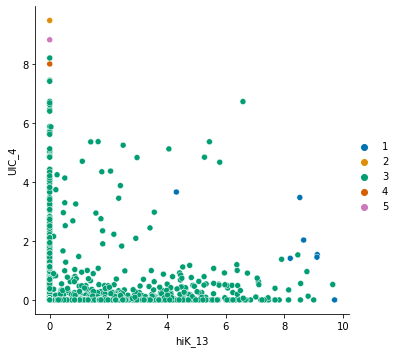

In [102]:
ax = sns.relplot(data = np.log2(data+1), x = "hiK_13", y = "UIC_4", hue = clusts, palette = "colorblind")
len(clusts)

### This didn't work very well on this data and the hierarchical clustering emthod is often not good for making discrete clusters. You can run kmeans clustering via the vq.kmeans2 function. This returns the centers of the clusters and the labels, the second argument is the number of clusters. 

### It is recommended to "whiten" the data. This is in reference to white noise. It makes all the components have 0 mean and unit variance:


In [143]:
centroids, clusts = scipy.cluster.vq.kmeans2(scipy.cluster.vq.whiten(np.log2(data+1)),6,minit = 'random')

1991

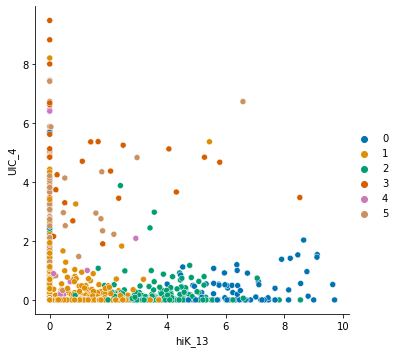

In [144]:
ax = sns.relplot(data = np.log2(data+1), x = "hiK_13", y = "UIC_4", hue = clusts, palette = "colorblind")
len(clusts)

### This looks substantially better. Remember that this is a high dimensional dataset and we are only visualizing two of the dimensions. 

### Clustering makes groups of genes but what do we do with these? Gene ontology tries to search for enriched sets of genes within these lists. The gget tool allows you to query the enrichr database for this.

### Lets start with a simple example. All the genes with BMP in their name:

In [151]:
import gget
BMP_list = list(data_human.index[data_human.index.str.contains("BMP")])
enrich_out = gget.enrichr(BMP_list,database="ontology")
enrich_out

Thu Sep 14 13:47:49 2023 INFO Performing Enichr analysis using database GO_Biological_Process_2021. 
    Please note that there might a more appropriate database for your application. 
    Go to https://maayanlab.cloud/Enrichr/#libraries for a full list of supported databases.
    


,rank,path_name,p_val,z_score,combined_score,overlapping_genes,adj_p_val,database
0,1,regulation of pathway-restricted SMAD protein ...,5.498012e-23,830.708333,42578.014212,"[BMP4, BMP3, BMP2, BMPR2, BMPER, BMP8A, BMP8B,...",2.397133e-20,GO_Biological_Process_2021
1,2,positive regulation of pathway-restricted SMAD...,4.787927e-21,787.381579,36840.158448,"[BMP4, BMP3, BMP2, BMPR2, BMP8A, BMP8B, BMP7, ...",1.043768e-18,GO_Biological_Process_2021
2,3,positive regulation of transmembrane receptor ...,7.540726e-21,485.439024,22492.316458,"[BMP4, BMP3, BMP2, BMPR2, BMP8A, BMP8B, BMPR1B...",1.095919e-18,GO_Biological_Process_2021
3,4,BMP signaling pathway (GO:0030509),1.117905e-19,533.812500,23294.328715,"[BMP4, BMP2, BMPR2, BMP8A, BMP8B, BMPR1B, BMP7...",1.218516e-17,GO_Biological_Process_2021
4,5,cellular response to BMP stimulus (GO:0071773),2.600277e-19,482.008065,20626.811498,"[BMP4, BMP2, BMPR2, BMP8A, BMP8B, BMPR1B, BMP7...",2.267442e-17,GO_Biological_Process_2021
...,...,...,...,...,...,...,...,...
431,432,cellular protein metabolic process (GO:0044267),2.710628e-01,3.360062,4.386241,[BMP4],2.735726e-01,GO_Biological_Process_2021
432,433,regulation of nucleic acid-templated transcrip...,2.782902e-01,3.256077,4.164819,[BMP2],2.802183e-01,GO_Biological_Process_2021
433,434,regulation of cellular macromolecule biosynthe...,2.990348e-01,2.985317,3.603860,[BMP2],3.004128e-01,GO_Biological_Process_2021
434,435,negative regulation of apoptotic process (GO:0...,3.081339e-01,2.877952,3.387984,[BMP4],3.088423e-01,GO_Biological_Process_2021


### This output is a pandas dataframe and you can programmatically extract its contents.  Note the p values which tell you whether it is likely that this number of genes would be found by random chance.

In [154]:
enrich_out = gget.enrichr(BMP_list,database="pathway")
enrich_out

Thu Sep 14 14:02:27 2023 INFO Performing Enichr analysis using database KEGG_2021_Human. 
    Please note that there might a more appropriate database for your application. 
    Go to https://maayanlab.cloud/Enrichr/#libraries for a full list of supported databases.
    


,rank,path_name,p_val,z_score,combined_score,overlapping_genes,adj_p_val,database
0,1,TGF-beta signaling pathway,3.691170e-18,351.176471,14096.430086,"[BMP4, BMP2, BMPR2, BMP8A, BMP8B, BMPR1B, BMP7...",4.798521e-17,KEGG_2021_Human
1,2,Hippo signaling pathway,6.089647e-16,193.159091,6767.284601,"[BMP4, BMP2, BMPR2, BMP8A, BMP8B, BMPR1B, BMP7...",3.958270e-15,KEGG_2021_Human
2,3,Cytokine-cytokine receptor interaction,1.177366e-15,138.245614,4752.261608,"[BMP4, BMP3, BMP2, BMPR2, BMP8A, BMP8B, BMPR1B...",5.101921e-15,KEGG_2021_Human
3,4,Fluid shear stress and atherosclerosis,2.873519e-06,53.468013,682.250422,"[BMP4, BMPR2, BMPR1B, BMPR1A]",8.364482e-06,KEGG_2021_Human
4,5,Signaling pathways regulating pluripotency of ...,3.217108e-06,51.918901,656.619780,"[BMP4, BMPR2, BMPR1B, BMPR1A]",8.364482e-06,KEGG_2021_Human
5,6,Axon guidance,3.111497e-04,27.662011,223.377277,"[BMPR2, BMPR1B, BMP7]",6.741577e-04,KEGG_2021_Human
6,7,Basal cell carcinoma,9.986090e-04,50.249685,347.182472,"[BMP4, BMP2]",1.854560e-03,KEGG_2021_Human
7,8,Thermogenesis,1.273607e-02,13.214047,57.657080,"[BMP8A, BMP8B]",2.069611e-02,KEGG_2021_Human
8,9,Ovarian steroidogenesis,3.758744e-02,28.478571,93.440623,[BMP6],5.429297e-02,KEGG_2021_Human
9,10,Pathways in cancer,5.880658e-02,5.658281,16.032749,"[BMP4, BMP2]",7.644855e-02,KEGG_2021_Human
